In [307]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import seaborn as sns; sns.set()
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from datetime import datetime as dt

In [308]:
#load store data
store = pd.read_csv("data/stores data-set.csv") #load store data
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [309]:
#load feature data
feature = pd.read_csv("data/Features data set.csv") 
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [47]:
#load sales data
sale = pd.read_csv("data\sales data-set.csv") 
sale.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [48]:
#Split Sales data
msk = np.random.rand(len(sale)) <= 0.7

train = sale[msk]
test = sale[~msk]

In [49]:
retail_data = pd.merge(train, feature, on = ['Store', 'Date'], how = 'inner')
retail_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [50]:
retail_data.shape

(294996, 15)

In [53]:
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

In [54]:
start_date = '2012-08-01'
end_date = '2012-10-31'
mask = (retail_data['Date'] > start_date) & (retail['Date'] <= end_date)

In [55]:
retail_data = retail_data.loc[mask]
retail_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
3670,1,1,2012-08-06,17666.00,False,78.3,3.452,8813.81,116.8,64.55,2652.04,7161.91,221.749484,7.143,False
3671,1,2,2012-08-06,49439.58,False,78.3,3.452,8813.81,116.8,64.55,2652.04,7161.91,221.749484,7.143,False
3672,1,3,2012-08-06,8614.64,False,78.3,3.452,8813.81,116.8,64.55,2652.04,7161.91,221.749484,7.143,False
3673,1,4,2012-08-06,41124.27,False,78.3,3.452,8813.81,116.8,64.55,2652.04,7161.91,221.749484,7.143,False
3674,1,6,2012-08-06,4888.46,False,78.3,3.452,8813.81,116.8,64.55,2652.04,7161.91,221.749484,7.143,False


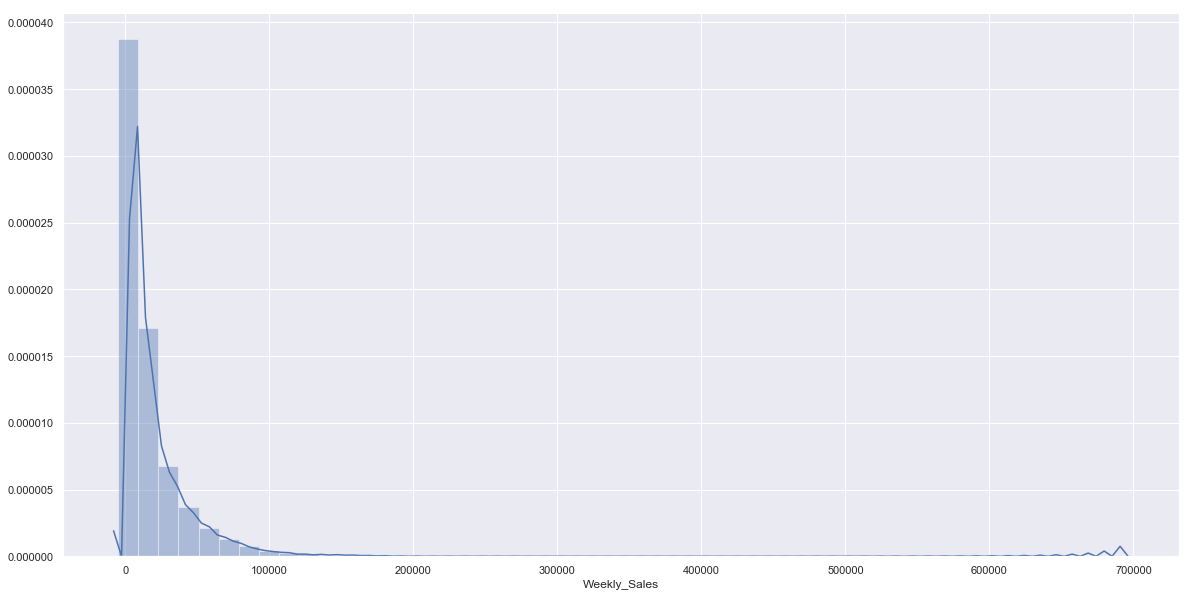

In [287]:
sns.distplot(retail_data.Weekly_Sales); 

In [310]:
retail_data = pd.merge(train, features, on = ['Store', 'Date'], how = 'inner')
retail_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [311]:
retail_data['DateTimeObj'] = [dt.strptime(x, '%Y-%m-%d') for x in list(retail_data['Date'])]
retail_data['DateTimeObj'].head()

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: DateTimeObj, dtype: datetime64[ns]

In [236]:
#retail_data['Date'] = pd.to_datetime(retail_data['Date'])

In [232]:
#start_date = '2012-08-01'
#end_date = '2012-10-31'
#mask = (retail_data['Date'] > start_date) & (retail_data['Date'] <= end_date)
#retail_data = df.loc[mask]
retail_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,DateTimeObj
9309,1,1,2012-08-03,16628.31,False,86.11,3.417,27584.78,119.98,30.23,12007.04,4661.71,221.949864,6.908,False,2012-08-03
9310,1,2,2012-08-03,49424.06,False,86.11,3.417,27584.78,119.98,30.23,12007.04,4661.71,221.949864,6.908,False,2012-08-03
9311,1,3,2012-08-03,30331.69,False,86.11,3.417,27584.78,119.98,30.23,12007.04,4661.71,221.949864,6.908,False,2012-08-03
9312,1,4,2012-08-03,41305.39,False,86.11,3.417,27584.78,119.98,30.23,12007.04,4661.71,221.949864,6.908,False,2012-08-03
9313,1,5,2012-08-03,17615.28,False,86.11,3.417,27584.78,119.98,30.23,12007.04,4661.71,221.949864,6.908,False,2012-08-03


In [312]:
sale_to_date = retail_data.groupby(['Store', 'Date'])['Weekly_Sales'].apply(lambda x: np.sum(x))
sale_to_dept_store = retail_data.groupby(['Store', 'Dept'])['Weekly_Sales'].apply(lambda x : np.sum(x))
sales_scale = sale_to_date.reset_index()
final_data = pd.merge(sales_scale, features, on = ['Store', 'Date'], how = 'inner')
final_data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [313]:
final_data_imp = final_data

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [243]:
final_data.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Type'], axis = 1, inplace = True)

In [244]:
final_data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False


In [245]:
final_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [246]:
final_data['DateTimeObj'] = [dt.strptime(x, '%Y-%m-%d') for x in list(final_data['Date'])]
final_data['Week'] = [(x - final_data['DateTimeObj'][0]) /7 for x in list(final_data['DateTimeObj'])]
final_data['Week'] = [np.timedelta64(x, 'D').astype(int) for x in final_data['Week']]
final_data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4


In [248]:
store_fix = pd.get_dummies(final_data.Store, prefix='Store').iloc[:,1:]
final_data = pd.concat([final_data, store_fix], axis = 1)

In [264]:
final_data_train, final_data_test = train_test_split(final_data, test_size=0.3,random_state=42)
X_train = final_data_train.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,final_data.shape[1]))]
Y_train = final_data_train.Weekly_Sales
                                                    
X_test = final_data_test.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,final_data.shape[1]))]
Y_test=final_data_test.Weekly_Sales

In [265]:
LR = linear_model.LinearRegression(normalize=True)
LR.fit(X_train, Y_train)
LR.score(X_test, Y_test )

0.915987610753601

In [271]:
Y_prediction_LR = LR.predict(X_test)

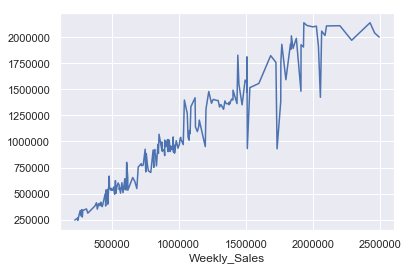

In [274]:
sns.lineplot(Y_test[0:200], Y_prediction_LR[0:200])

In [279]:
GB = GradientBoostingRegressor()

In [281]:
GB.fit(X_train, Y_train)
Y_prediction_GB = GB.predict(X_test)
GB.score(X_test,Y_test)

0.8102399973008099

In [282]:
print('Linear Regression Accuracy: {:.4f}'.format(LR.score(X_test,Y_test)))
print('Gradient Boostinf Accuracy: {:.4f}'.format(GB.score(X_test,Y_test)))

Linear Regression Accuracy: 0.9160
Gradient Boostinf Accuracy: 0.8102


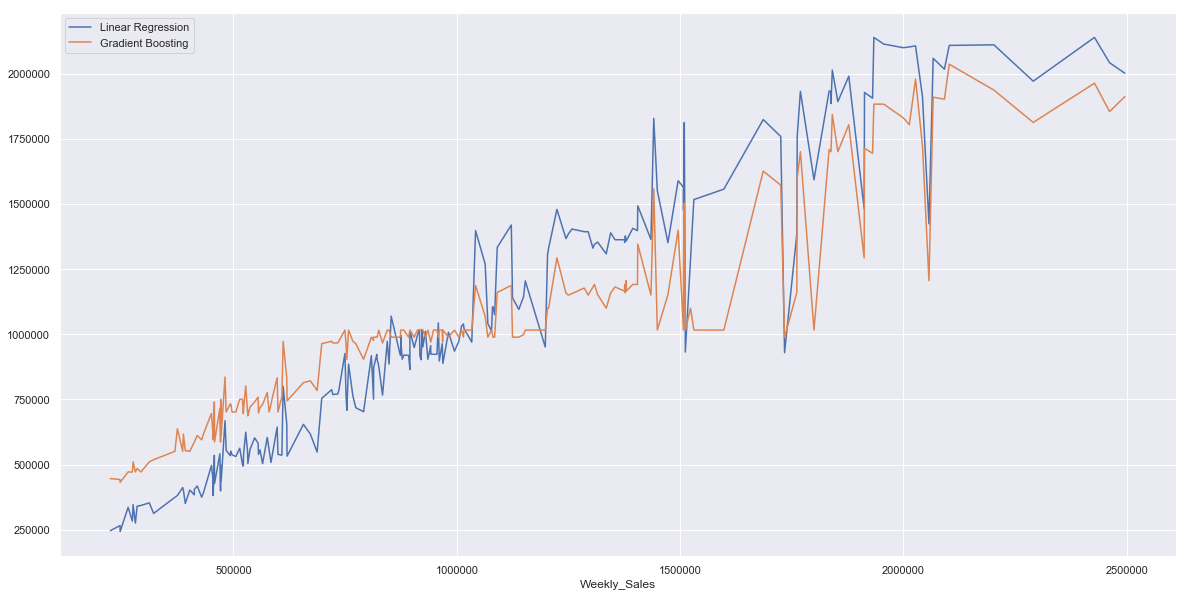

In [286]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(Y_test[0:200], Y_prediction_LR[0:200])
sns.lineplot(Y_test[0:200], Y_prediction_GB[0:200])
plt.legend(["Linear Regression", "Gradient Boosting"])

In [288]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [290]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_train_t, Y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
4504/4504 [==============================] - 2s 538us/step - loss: 1401353215665.3357
Epoch 2/200
4504/4504 [==============================] - 1s 223us/step - loss: 1397292726632.1279
Epoch 3/200
4504/4504 [==============================] - 1s 219us/step - loss: 1389840931365.2859
Epoch 4/200
4504/4504 [==============================] - 1s 216us/step - loss: 1379566397909.2576
Epoch 5/200
4504/4504 [==============================] - 1s 219us/step - loss: 1366901817111.1902
Epoch 6/200
4504/4504 [==============================] - 1s 223us/step - loss: 1352159901445.0017
Epoch 7/200
4504/4504 [==============================] - 1s 218us/step - loss: 1335569882277.5132
Epoch 8/200
4504/4504 [==============================] - 1s 216us/step - loss: 1317305548829.1013
Epoch 9/200
4504/4504 [==============================] - 1s 219us/step - loss: 1297505069001.435

4504/4504 [==============================] - 1s 223us/step - loss: 372382772331.3109
Epoch 79/200
4504/4504 [==============================] - ETA: 0s - loss: 370789418749.66 - 1s 234us/step - loss: 372314984957.2718
Epoch 80/200
4504/4504 [==============================] - 1s 218us/step - loss: 372247556801.7052
Epoch 81/200
4504/4504 [==============================] - 1s 216us/step - loss: 372180484132.3765
Epoch 82/200
4504/4504 [==============================] - 1s 217us/step - loss: 372113743129.9183
Epoch 83/200
4504/4504 [==============================] - 1s 217us/step - loss: 372047329887.4885
Epoch 84/200
4504/4504 [==============================] - 1s 220us/step - loss: 371981241982.4085
Epoch 85/200
4504/4504 [==============================] - 1s 218us/step - loss: 371915453841.9609
Epoch 86/200
4504/4504 [==============================] - 1s 215us/step - loss: 371849978081.5346
Epoch 87/200
4504/4504 [==============================] - 1s 224us/step - loss: 371784820339.4955

4504/4504 [==============================] - 1s 222us/step - loss: 367677529093.4565
Epoch 161/200
4504/4504 [==============================] - 1s 223us/step - loss: 367628157204.4619
Epoch 162/200
4504/4504 [==============================] - 1s 227us/step - loss: 367578939668.4619
Epoch 163/200
4504/4504 [==============================] - 1s 222us/step - loss: 367529860596.1776
Epoch 164/200
4504/4504 [==============================] - 1s 222us/step - loss: 367480918678.0533
Epoch 165/200
4504/4504 [==============================] - 1s 221us/step - loss: 367432113426.6430
Epoch 166/200
4504/4504 [==============================] - 1s 218us/step - loss: 367383438235.9645
Epoch 167/200
4504/4504 [==============================] - 1s 221us/step - loss: 367334897121.9894
Epoch 168/200
4504/4504 [==============================] - 1s 218us/step - loss: 367286496297.8331
Epoch 169/200
4504/4504 [==============================] - 1s 219us/step - loss: 367238218906.6003
Epoch 170/200
4504/4504 

In [291]:
Y_prediction_test = model_lstm.predict(X_test_t)
print("Score:\t{:0.4f}".format(r2_score(Y_test, Y_prediction_test)))
r2_test = r2_score(Y_test, Y_prediction_test)

Score:	-0.1635


In [315]:
# Replace all NaN with their average column values
final_data_imp["MarkDown1"] = final_data_imp["MarkDown1"].fillna(7390.460057)
final_data_imp["MarkDown2"] = final_data_imp["MarkDown2"].fillna(646.465673)
final_data_imp["MarkDown3"] = final_data_imp["MarkDown3"].fillna(42.437716)
final_data_imp["MarkDown4"] = final_data_imp["MarkDown4"].fillna(3260.846284)
final_data_imp["MarkDown5"] = final_data_imp["MarkDown5"].fillna(4478.787717)

In [317]:
final_data_imp.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,7390.460057,646.465673,42.437716,3260.846284,4478.787717,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,7390.460057,646.465673,42.437716,3260.846284,4478.787717,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,7390.460057,646.465673,42.437716,3260.846284,4478.787717,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,7390.460057,646.465673,42.437716,3260.846284,4478.787717,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,7390.460057,646.465673,42.437716,3260.846284,4478.787717,211.350143,8.106,False


In [318]:
final_data_imp.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64